In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
from sklearn.metrics import classification_report
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
np.random.seed(42)

In [2]:
AA="C:/Users/ganes/onedrive/Desktop/AI/Acidity/Acidity.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape 


(215, 29)

In [3]:
X = pd.read_excel(AA, usecols='A:AA') 
Y=pd.read_excel(AA, usecols='AC')

In [4]:
Y.head(5)

,CL
0,0
1,0
2,0
3,0
4,1


In [5]:
X_OS=X
Y_OS=Y.values.ravel()

C:\Users\ganes\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Train accuracy: 0.9810678196657598
Test accuracy: 0.9170634920634921
Train precision: 0.9813047946388762
Test precision: 0.921517094017094
Train recall: 0.9810645161290322
Test recall: 0.9167582417582418
Train F1-score: 0.9810636240900361
Test F1-score: 0.9166420326161706
Matthews correlation coefficient (Train): 0.9623692400469513
Matthews correlation coefficient (Test): 0.8382043350854242

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       124

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249


Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      1.00      0.97        14

    accuracy                           0.96        2

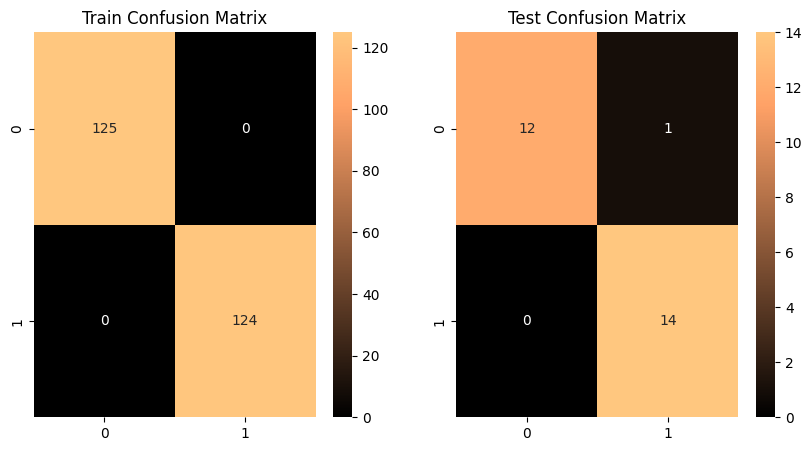

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_OS and Y_OS are your original data features and labels

# 1. Apply SMOTE to balance the data
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X_OS, Y_OS)

# 2. Set up Stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# 3. Define hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],                # Number of trees in the forest
    'max_depth': [10, 20, 30, None],           # Max depth of trees
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2', None]     # Corrected: Removed 'auto', used 'sqrt' instead
}

# Initialize GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1)

# 4. Use cross-validation to train and evaluate
score_trainacc, score_testacc = [], []
score_trainpre, score_testpre = [], []
score_trainrecall, score_testrecall = [], []
score_trainf1, score_testf1 = [], []
mmc_dttrain, mmc_dttest = [], []
conf_matrix_Train, conf_matrix_Test = [], []

for train_index, test_index in cv.split(X_res, Y_res):
    # Split the data into training and testing sets
    X_Train, X_Test = X_res.iloc[train_index], X_res.iloc[test_index]
    Y_Train, Y_Test = Y_res[train_index], Y_res[test_index]
    
    # Fit the model with GridSearchCV
    grid_search.fit(X_Train, Y_Train)
    best_model = grid_search.best_estimator_
    
    # Predictions for training and test data
    predict_dttrain = best_model.predict(X_Train)
    predict_dttest = best_model.predict(X_Test)
    
    # 5. Calculate performance metrics
    Acctrain = metrics.accuracy_score(Y_Train, predict_dttrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_dttest)
    score_testacc.append(Acctest)

    pretrain = metrics.precision_score(Y_Train, predict_dttrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_dttest, average="macro")
    score_testpre.append(pretest)

    recalltrain = metrics.recall_score(Y_Train, predict_dttrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_dttest, average="macro")
    score_testrecall.append(recalltest)

    f1train = metrics.f1_score(Y_Train, predict_dttrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_dttest, average="macro")
    score_testf1.append(f1test)

    # 6. Calculate Matthews correlation coefficient
    mmc_train = metrics.matthews_corrcoef(Y_Train, predict_dttrain)
    mmc_dttrain.append(mmc_train)
    mmc_test = metrics.matthews_corrcoef(Y_Test, predict_dttest)
    mmc_dttest.append(mmc_test)
    
    # 7. Confusion matrix
    conf_matrix1 = confusion_matrix(Y_Train, predict_dttrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_dttest)
    conf_matrix_Train.append(conf_matrix1)
    conf_matrix_Test.append(conf_matrix2)

# 8. Print average performance metrics across folds
print("Train accuracy:", np.mean(score_trainacc))
print("Test accuracy:", np.mean(score_testacc))
print("Train precision:", np.mean(score_trainpre))
print("Test precision:", np.mean(score_testpre))
print("Train recall:", np.mean(score_trainrecall))
print("Test recall:", np.mean(score_testrecall))
print("Train F1-score:", np.mean(score_trainf1))
print("Test F1-score:", np.mean(score_testf1))
print("Matthews correlation coefficient (Train):", np.mean(mmc_dttrain))
print("Matthews correlation coefficient (Test):", np.mean(mmc_dttest))

# 9. Classification reports for the final fold (example)
print("\nClassification Report (Train):")
print(metrics.classification_report(Y_Train, predict_dttrain))
print("\nClassification Report (Test):")
print(metrics.classification_report(Y_Test, predict_dttest))

# 10. Plot Confusion Matrix for the final fold
plt.figure(figsize=(10, 5))

# Confusion matrix for Train data
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.title('Train Confusion Matrix')

# Confusion matrix for Test data
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix2, annot=True, cmap='copper', fmt="g")
plt.title('Test Confusion Matrix')

plt.show()


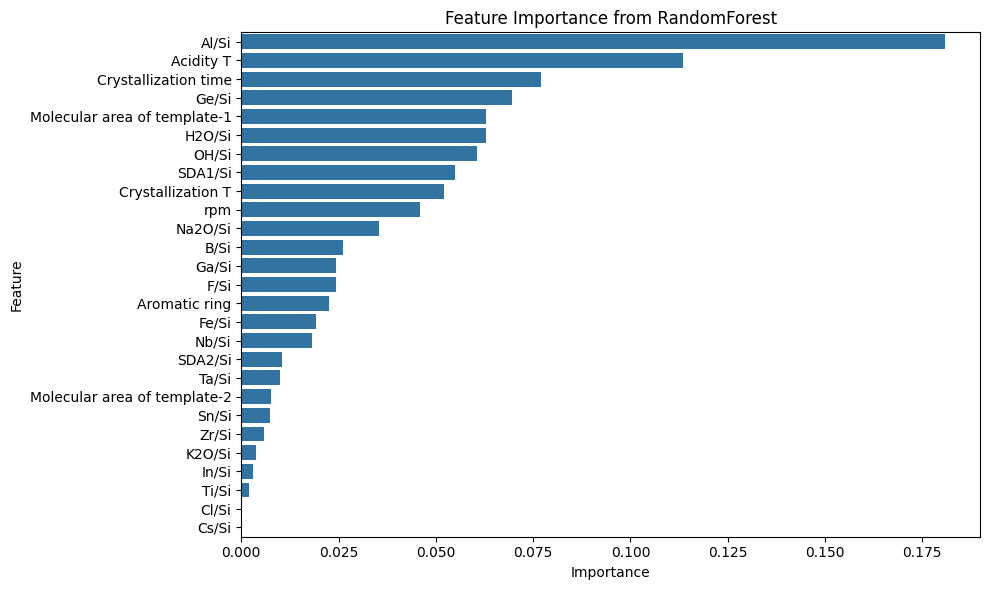

In [7]:
# 11. Feature Importance

# Get feature importance from the best model found by GridSearchCV
feature_importances = best_model.feature_importances_

# Assuming your feature names are in the same order as the columns of X_res
features = X_res.columns

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# 12. Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importance from RandomForest')
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef

ex_t="C:/Users/ganes/onedrive/Desktop/AI/Acidity/External.xlsx"
external_data=pd.read_excel(ex_t)

# Load your external data


# Preprocess the data (assuming the external data has similar features as your training data)
# Ensure you apply the same preprocessing steps as you did for your training data
# For example, if you did any encoding or scaling, apply it here

# Split features and target
X_external = pd.read_excel(ex_t, usecols='A:AA')  # Replace 'target' with the actual target column name
y_external = pd.read_excel(ex_t, usecols='AC')

# Predictions on external data
y_external_pred = best_model.predict(X_external)

Acctrain = metrics.accuracy_score(y_external, y_external_pred)
print(Acctrain)

1.0
